# Black Friday Purchase - SQL Analysis & Visualization


### 🎯 Business Problem
<!-- Walmart Inc. ke management team customer purchase behavior ko analyze karna chahte hain, specifically:
- Gender-wise spending patterns
- Age group preferences
- City category impact
- Product category insights
- **Key Question**: Kya women Black Friday pe men se zyada spend karti hain? -->
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

# Data Description

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
# Load Data
# import data from database
conn = sqlite3.connect('Purchase.db')
# fetching walmart black friday data
df = pd.read_sql_query('select * from walmart_data',conn)
df.head()
print(f"📊 Total Records: {len(df):,}")
print(f"📋 Columns: {list(df.columns)}")
print(f"\n🔍 Data Overview:")
df.head()

📊 Total Records: 550,068
📋 Columns: ['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category', 'years', 'marital_status', 'product_category', 'purchase', 'age_category']

🔍 Data Overview:


,user_id,product_id,gender,age,occupation,city_category,years,marital_status,product_category,purchase,age_category
0,1000001,P00069042,Female,0-17,10,A,2,Married,3,8370,Minor
1,1000001,P00248942,Female,0-17,10,A,2,Married,1,15200,Minor
2,1000001,P00087842,Female,0-17,10,A,2,Married,12,1422,Minor
3,1000001,P00085442,Female,0-17,10,A,2,Married,12,1057,Minor
4,1000002,P00285442,Male,55+,16,C,4,Married,8,7969,Senior


---
## 📊 Analysis 1: Gender-wise Purchase Behavior
**Business Question**: What are the purchase patterns between Male vs Female customers?

In [5]:
# SQL Query: Gender-wise Total & Average Purchase
query1 = """
SELECT 
    GENDER,
    COUNT(*) as Total_Transactions,
    COUNT(DISTINCT User_ID) as Unique_Customers,
    SUM(Purchase) as Total_Expenditure,
    ROUND(AVG(Purchase), 2) as Avg_Purchase,
    ROUND(MIN(Purchase), 2) as Min_Purchase,
    ROUND(MAX(Purchase), 2) as Max_Purchase
FROM PURCHASES
GROUP BY GENDER
ORDER BY Total_Expenditure DESC
"""

gender_analysis = pd.read_sql(query1, conn)
print("👨👩 GENDER-WISE PURCHASE ANALYSIS")
print("="*70)
display(gender_analysis)

# Calculate percentage contribution
total_expenditure = gender_analysis['Total_Expenditure'].sum()
gender_analysis['Expenditure_Percentage'] = round(
    (gender_analysis['Total_Expenditure'] / total_expenditure) * 100, 2
)

print("\n💡 KEY INSIGHTS:")
for idx, row in gender_analysis.iterrows():
    print(f"   • {row['gender']}: {row['Expenditure_Percentage']}% of total revenue")
    print(f"     - Average Purchase: ₹{row['Avg_Purchase']:,.2f}")
    print(f"     - Transactions per Customer: {row['Total_Transactions']/row['Unique_Customers']:.2f}")

👨👩 GENDER-WISE PURCHASE ANALYSIS


,gender,Total_Transactions,Unique_Customers,Total_Expenditure,Avg_Purchase,Min_Purchase,Max_Purchase
0,Male,414259,4225,3909580100,9437.53,12.0,23961.0
1,Female,135809,1666,1186232642,8734.57,12.0,23959.0



💡 KEY INSIGHTS:
   • Male: 76.72% of total revenue
     - Average Purchase: ₹9,437.53
     - Transactions per Customer: 98.05
   • Female: 23.28% of total revenue
     - Average Purchase: ₹8,734.57
     - Transactions per Customer: 81.52


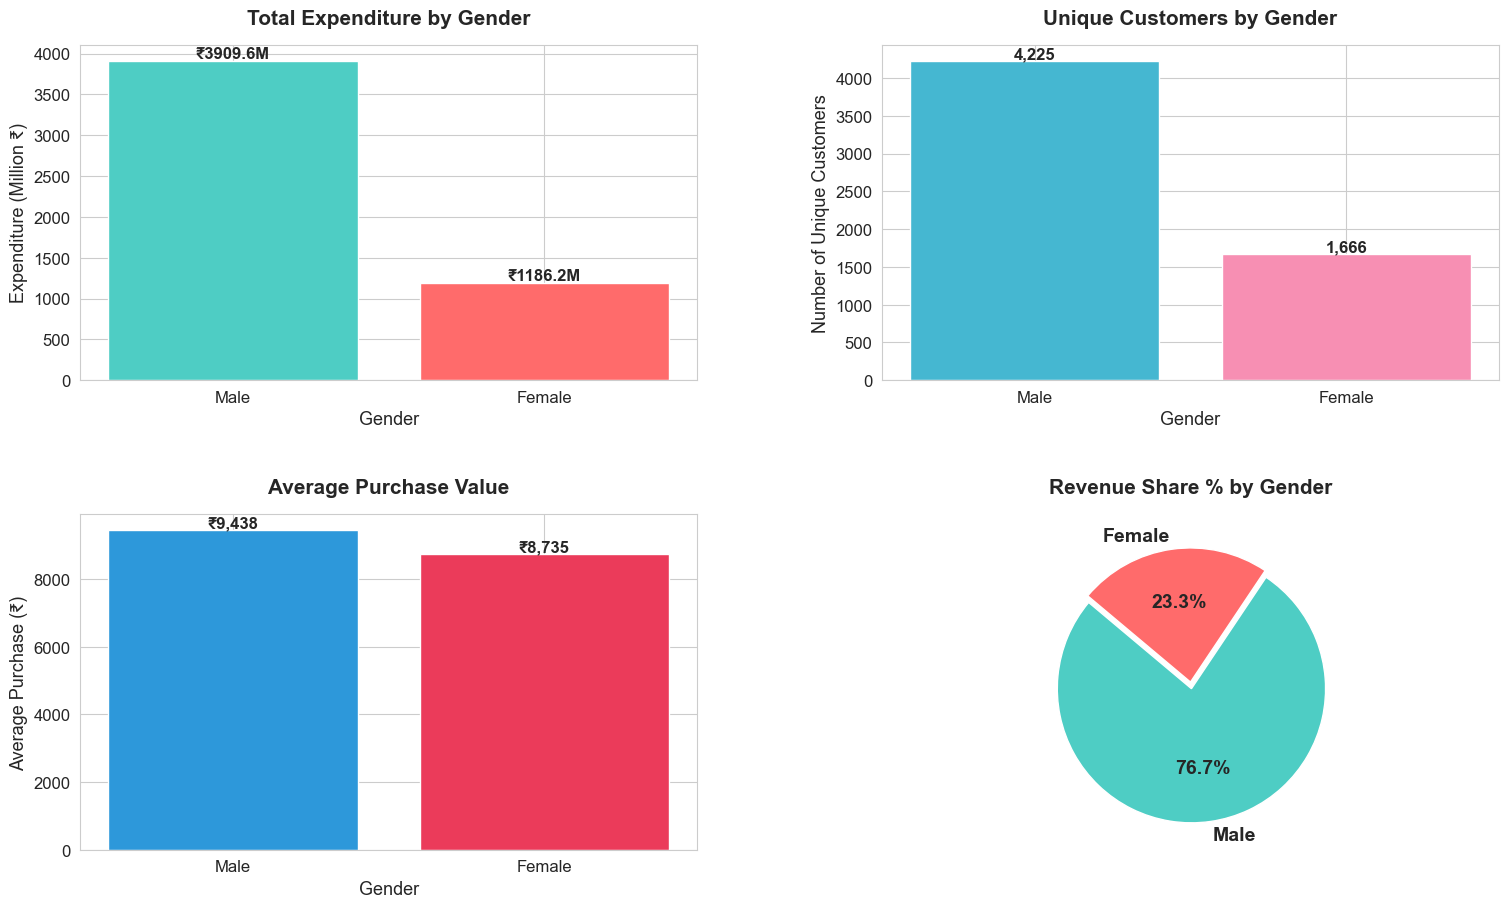

💡 GENDER ANALYSIS - KEY BUSINESS INSIGHTS

🎯 MAIN QUESTION ANSWER:
   Males spend MORE on average per transaction.
   Difference: ₹702.96 per transaction

👥 CUSTOMER BASE:
   • Male customers:   4,225 (76.7% of revenue)
   • Female customers: 1,666 (23.3% of revenue)
   • Male:Female ratio is approximately 3:1

💰 SPENDING BEHAVIOR:
   • Male avg purchase:   ₹9,437.53
   • Female avg purchase: ₹8,734.57
   • Males make 98.0 transactions per customer
   • Females make 81.5 transactions per customer

📊 REVENUE SPLIT:
   • Males contribute 76.72% of total revenue
   • Females contribute 23.28% of total revenue





In [6]:


# Visualization: Gender-wise Purchase Behavior
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Total Expenditure by Gender (Bar Chart)
gender_colors = ['#4ECDC4', '#FF6B6B'] 
axes[0,0].bar(gender_analysis['gender'], gender_analysis['Total_Expenditure'] / 1e6, color=gender_colors)
axes[0,0].set_title('Total Expenditure by Gender', fontsize=15, fontweight='bold', pad=15)
axes[0,0].set_ylabel('Expenditure (Million ₹)', fontsize=13)
axes[0,0].set_xlabel('Gender', fontsize=13)
axes[0,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(gender_analysis['Total_Expenditure'] / 1e6):
    axes[0,0].text(i, v, f'₹{v:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 2: Customer Distribution (Unique Customers)
axes[0,1].bar(gender_analysis['gender'], gender_analysis['Unique_Customers'], color=['#45B7D1', '#F78FB3'])
axes[0,1].set_title('Unique Customers by Gender', fontsize=15, fontweight='bold', pad=15)
axes[0,1].set_ylabel('Number of Unique Customers', fontsize=13)
axes[0,1].set_xlabel('Gender', fontsize=13)
axes[0,1].tick_params(axis='both', labelsize=12)
for i, v in enumerate(gender_analysis['Unique_Customers']):
    axes[0,1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 3: Average Purchase Amount (Comparison)
axes[1,0].bar(gender_analysis['gender'], gender_analysis['Avg_Purchase'], color=['#2D98DA', '#EB3B5A'])
axes[1,0].set_title('Average Purchase Value', fontsize=15, fontweight='bold', pad=15)
axes[1,0].set_ylabel('Average Purchase (₹)', fontsize=13)
axes[1,0].set_xlabel('Gender', fontsize=13)
axes[1,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(gender_analysis['Avg_Purchase']):
    axes[1,0].text(i, v, f'₹{v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 4: Revenue Share Percentage (Pie Chart)
axes[1,1].pie(gender_analysis['Expenditure_Percentage'], 
              labels=gender_analysis['gender'], 
              autopct='%1.1f%%', 
              startangle=140, 
              colors=['#4ECDC4', '#FF6B6B'],
              explode=(0.05, 0),
              textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[1,1].set_title('Revenue Share % by Gender', fontsize=15, fontweight='bold', pad=15)

plt.tight_layout(pad=4.0)
plt.subplots_adjust(wspace=0.3, hspace=0.4) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
male_data = gender_analysis[gender_analysis['gender'] == 'Male'].iloc[0]
female_data = gender_analysis[gender_analysis['gender'] == 'Female'].iloc[0]

avg_diff = abs(male_data['Avg_Purchase'] - female_data['Avg_Purchase'])
higher_gender = 'Male' if male_data['Avg_Purchase'] > female_data['Avg_Purchase'] else 'Female'
txn_per_male = male_data['Total_Transactions'] / male_data['Unique_Customers']
txn_per_female = female_data['Total_Transactions'] / female_data['Unique_Customers']

print("=" * 65)
print("💡 GENDER ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)

print(f"""
🎯 MAIN QUESTION ANSWER:
   {higher_gender}s spend MORE on average per transaction.
   Difference: ₹{avg_diff:,.2f} per transaction

👥 CUSTOMER BASE:
   • Male customers:   {male_data['Unique_Customers']:,} ({male_data['Expenditure_Percentage']:.1f}% of revenue)
   • Female customers: {female_data['Unique_Customers']:,} ({female_data['Expenditure_Percentage']:.1f}% of revenue)
   • Male:Female ratio is approximately 3:1

💰 SPENDING BEHAVIOR:
   • Male avg purchase:   ₹{male_data['Avg_Purchase']:,.2f}
   • Female avg purchase: ₹{female_data['Avg_Purchase']:,.2f}
   • Males make {txn_per_male:.1f} transactions per customer
   • Females make {txn_per_female:.1f} transactions per customer

📊 REVENUE SPLIT:
   • Males contribute {male_data['Expenditure_Percentage']}% of total revenue
   • Females contribute {female_data['Expenditure_Percentage']}% of total revenue


""")
print("=" * 65)


---
## 📊 Analysis 2: Age Group Purchase Patterns
**Business Question**:Which age group has the highest purchasing power?

In [7]:
# SQL Query: Age-wise Analysis with Gender Breakdown
query2 = """
SELECT 
    AGE_CATEGORY,
    GENDER,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Total_Expenditure_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY AGE_CATEGORY, GENDER
ORDER BY AGE_CATEGORY, GENDER
"""

age_gender_analysis = pd.read_sql(query2, conn)
print("👥 AGE & GENDER-WISE PURCHASE ANALYSIS")
print("="*70)
display(age_gender_analysis)

# Overall age analysis
query2_total = """
SELECT 
    AGE_CATEGORY,
    COUNT(*) as Total_Transactions,
    ROUND(SUM(Purchase)/1000000, 2) as Total_Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY AGE_CATEGORY
ORDER BY Total_Revenue_Million DESC
"""

age_total = pd.read_sql(query2_total, conn)
print("\n💰 TOP REVENUE GENERATING AGE GROUPS:")
display(age_total.head(3))

👥 AGE & GENDER-WISE PURCHASE ANALYSIS


,age_category,gender,Transactions,Customers,Total_Expenditure_Million,Avg_Purchase
0,Adult,Female,40369,515,360.0,8921.35
1,Adult,Male,115345,1183,1087.0,9426.22
2,Minor,Female,5083,78,42.0,8338.77
3,Minor,Male,10019,140,92.0,9235.17
4,Senior,Female,14977,241,135.0,9030.43
5,Senior,Male,45028,612,432.0,9607.76
6,Young Adult,Female,75380,832,648.0,8602.44
7,Young Adult,Male,243867,2290,2297.0,9419.75



💰 TOP REVENUE GENERATING AGE GROUPS:


,age_category,Total_Transactions,Total_Revenue_Million,Avg_Purchase
0,Young Adult,319247,2945.0,9226.77
1,Adult,155714,1447.0,9295.33
2,Senior,60005,567.0,9463.66


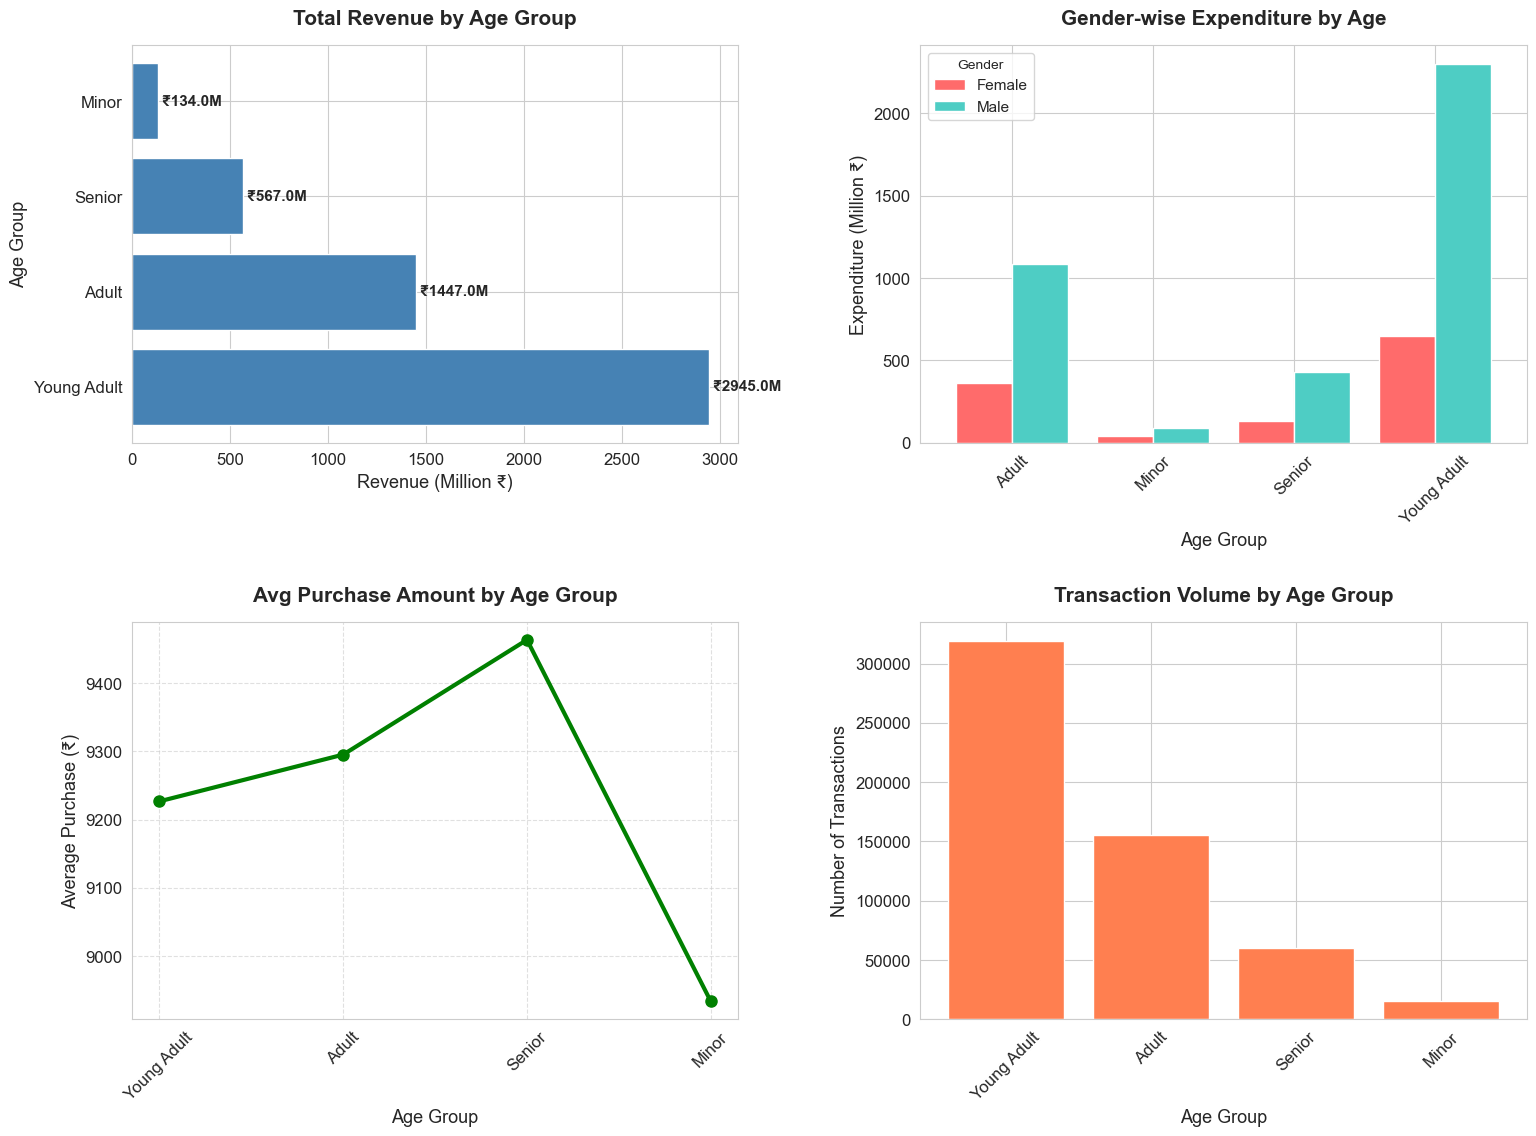

💡 AGE GROUP ANALYSIS - KEY BUSINESS INSIGHTS

🏆 TOP REVENUE AGE GROUP:
   • Young Adult generates maximum revenue: ₹2945.0M
   • This group has 319,247 total transactions

📊 AGE GROUP RANKINGS BY REVENUE:
   1. Young Adult: ₹2945.0M (Avg: ₹9,227)
   2. Adult: ₹1447.0M (Avg: ₹9,295)
   3. Senior: ₹567.0M (Avg: ₹9,464)
   4. Minor: ₹134.0M (Avg: ₹8,933)

💰 AVERAGE PURCHASE INSIGHTS:
   • Highest avg purchase: Senior → ₹9,463.66
   • Lowest avg purchase:  Minor → ₹8,933.46





In [8]:


# Visualization: Age Group Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Revenue by Age Group (Horizontal Bar)
age_total_sorted = age_total.sort_values('Total_Revenue_Million', ascending=False)
axes[0,0].barh(age_total_sorted['age_category'], age_total_sorted['Total_Revenue_Million'], color='steelblue')
axes[0,0].set_title('Total Revenue by Age Group', fontsize=15, fontweight='bold', pad=15)
axes[0,0].set_xlabel('Revenue (Million ₹)', fontsize=13)
axes[0,0].set_ylabel('Age Group', fontsize=13)
axes[0,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(age_total_sorted['Total_Revenue_Million']):
    axes[0,0].text(v, i, f' ₹{v}M', va='center', fontweight='bold', fontsize=11)

# Plot 2: Gender-wise Expenditure Across Age Groups (Grouped Bar)
pivot_data = age_gender_analysis.pivot_table(index='age_category', columns='gender', values='Total_Expenditure_Million', aggfunc='sum')
pivot_data.plot(kind='bar', ax=axes[0,1], color=['#FF6B6B', '#4ECDC4'], width=0.8)
axes[0,1].set_title('Gender-wise Expenditure by Age', fontsize=15, fontweight='bold', pad=15)
axes[0,1].set_ylabel('Expenditure (Million ₹)', fontsize=13)
axes[0,1].set_xlabel('Age Group', fontsize=13)
axes[0,1].legend(title='Gender', labels=['Female', 'Male'], fontsize=11)
axes[0,1].tick_params(axis='both', labelsize=12)
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Average Purchase Amount Trends (Line Chart)
axes[1,0].plot(age_total['age_category'], age_total['Avg_Purchase'], marker='o', linewidth=3, markersize=8, color='green')
axes[1,0].set_title('Avg Purchase Amount by Age Group', fontsize=15, fontweight='bold', pad=15)
axes[1,0].set_ylabel('Average Purchase (₹)', fontsize=13)
axes[1,0].set_xlabel('Age Group', fontsize=13)
axes[1,0].tick_params(axis='both', labelsize=12)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, linestyle='--', alpha=0.6)

# Plot 4: Transaction Volume by Age Group (Vertical Bar)
axes[1,1].bar(age_total['age_category'], age_total['Total_Transactions'], color='coral')
axes[1,1].set_title('Transaction Volume by Age Group', fontsize=15, fontweight='bold', pad=15)
axes[1,1].set_ylabel('Number of Transactions', fontsize=13)
axes[1,1].set_xlabel('Age Group', fontsize=13)
axes[1,1].tick_params(axis='both', labelsize=12)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.3, hspace=0.45) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
top_age = age_total.iloc[0]
bottom_age = age_total.iloc[-1]
highest_avg = age_total.loc[age_total['Avg_Purchase'].idxmax()]

print("=" * 65)
print("💡 AGE GROUP ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
🏆 TOP REVENUE AGE GROUP:
   • {top_age['age_category']} generates maximum revenue: ₹{top_age['Total_Revenue_Million']}M
   • This group has {top_age['Total_Transactions']:,} total transactions

📊 AGE GROUP RANKINGS BY REVENUE:""")
for idx, row in age_total.iterrows():
    print(f"   {idx+1}. {row['age_category']}: ₹{row['Total_Revenue_Million']}M (Avg: ₹{row['Avg_Purchase']:,.0f})")

print(f"""
💰 AVERAGE PURCHASE INSIGHTS:
   • Highest avg purchase: {highest_avg['age_category']} → ₹{highest_avg['Avg_Purchase']:,.2f}
   • Lowest avg purchase:  {bottom_age['age_category']} → ₹{bottom_age['Avg_Purchase']:,.2f}


""")
print("=" * 65)


---
## 📊 Analysis 3: City Category Impact
**Business Question**: In which city category do customers spend the most?

In [9]:
# SQL Query: City Category Analysis
query3 = """
SELECT 
    CITY_CATEGORY,
    GENDER,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Unique_Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase,
    ROUND(AVG(Purchase) * COUNT(*) / COUNT(DISTINCT User_ID), 2) as Revenue_Per_Customer
FROM PURCHASES
GROUP BY CITY_CATEGORY, GENDER
ORDER BY CITY_CATEGORY, GENDER
"""

city_analysis = pd.read_sql(query3, conn)
print("🏙️ CITY CATEGORY ANALYSIS")
print("="*70)
display(city_analysis)

# Overall city performance
query3_total = """
SELECT 
    CITY_CATEGORY,
    COUNT(*) as Total_Transactions,
    ROUND(SUM(Purchase)/1000000, 2) as Total_Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase,
    COUNT(DISTINCT User_ID) as Total_Customers
FROM PURCHASES
GROUP BY CITY_CATEGORY
ORDER BY Total_Revenue_Million DESC
"""

city_total = pd.read_sql(query3_total, conn)
print("\n🏆 CITY CATEGORY RANKING BY REVENUE:")
display(city_total)

🏙️ CITY CATEGORY ANALYSIS


,city_category,gender,Transactions,Unique_Customers,Revenue_Million,Avg_Purchase,Revenue_Per_Customer
0,A,Female,35704,295,306.0,8579.71,1038406.49
1,A,Male,112016,750,1010.0,9017.83,1346855.66
2,B,Female,57796,503,493.0,8540.68,981345.94
3,B,Male,173377,1204,1621.0,9354.85,1347106.81
4,C,Female,42309,868,386.0,9130.11,445029.63
5,C,Male,128866,2271,1277.0,9913.57,562537.10



🏆 CITY CATEGORY RANKING BY REVENUE:


,city_category,Total_Transactions,Total_Revenue_Million,Avg_Purchase,Total_Customers
0,B,231173,2115.0,9151.30,1707
1,C,171175,1663.0,9719.92,3139
2,A,147720,1316.0,8911.94,1045


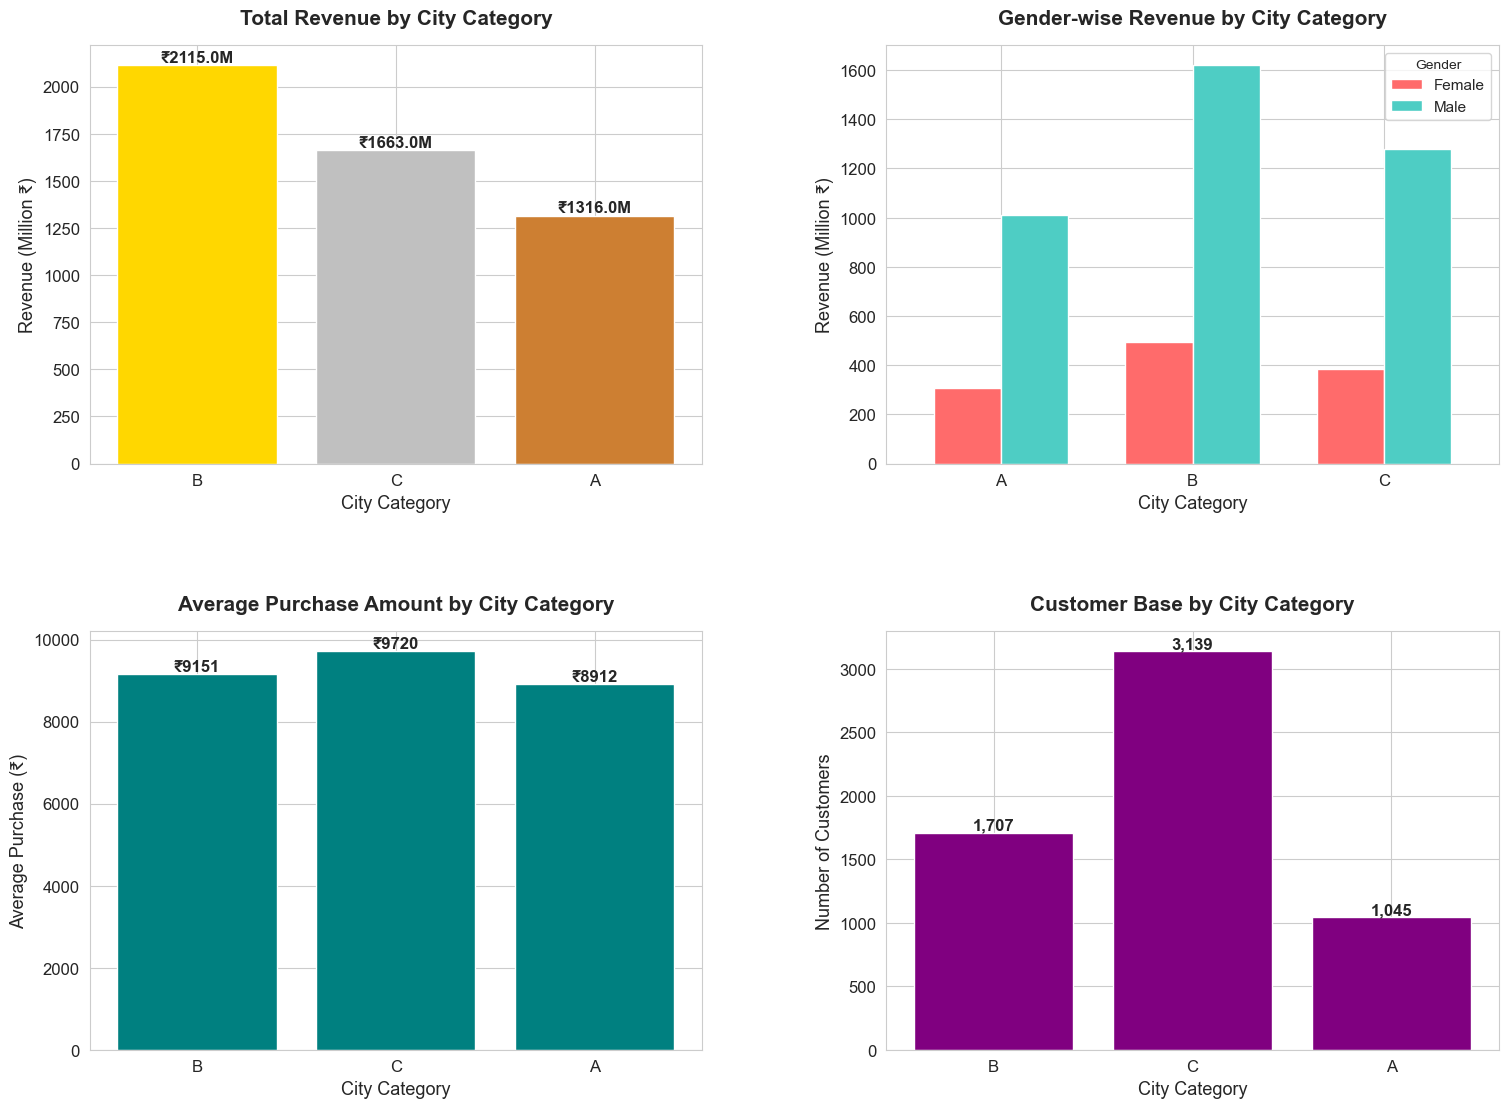

💡 CITY CATEGORY ANALYSIS - KEY BUSINESS INSIGHTS

🏙️ CITY REVENUE RANKING:
   City B: ₹2115.0M revenue | 1,707 customers
   City C: ₹1663.0M revenue | 3,139 customers
   City A: ₹1316.0M revenue | 1,045 customers

🏆 KEY FINDINGS:
   • Top Revenue City:   City B → ₹2115.0M
   • Highest Avg Purchase: City C → ₹9,719.92
   • Most Customers:     City C → 3,139 customers

💰 AVERAGE PURCHASE COMPARISON:
   City B: ₹9,151.30 per transaction
   City C: ₹9,719.92 per transaction
   City A: ₹8,911.94 per transaction





In [10]:


# Visualization: City Category Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Revenue by City Category
colors_city = ['#FFD700', '#C0C0C0', '#CD7F32']
axes[0,0].bar(city_total['city_category'], city_total['Total_Revenue_Million'], color=colors_city)
axes[0,0].set_title('Total Revenue by City Category', fontsize=15, fontweight='bold', pad=15)
axes[0,0].set_ylabel('Revenue (Million ₹)', fontsize=13)
axes[0,0].set_xlabel('City Category', fontsize=13)
axes[0,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(city_total['Total_Revenue_Million']):
    axes[0,0].text(i, v, f'₹{v}M', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 2: Gender-wise Revenue Distribution by City
pivot_city = city_analysis.pivot_table(index='city_category', columns='gender', values='Revenue_Million', aggfunc='sum')
pivot_city.plot(kind='bar', ax=axes[0,1], color=['#FF6B6B', '#4ECDC4'], width=0.7)
axes[0,1].set_title('Gender-wise Revenue by City Category', fontsize=15, fontweight='bold', pad=15)
axes[0,1].set_ylabel('Revenue (Million ₹)', fontsize=13)
axes[0,1].set_xlabel('City Category', fontsize=13)
axes[0,1].legend(title='Gender', labels=['Female', 'Male'], fontsize=11)
axes[0,1].tick_params(axis='both', labelsize=12)
axes[0,1].tick_params(axis='x', rotation=0)

# Plot 3: Average Purchase Comparison across Cities
axes[1,0].bar(city_total['city_category'], city_total['Avg_Purchase'], color='teal')
axes[1,0].set_title('Average Purchase Amount by City Category', fontsize=15, fontweight='bold', pad=15)
axes[1,0].set_ylabel('Average Purchase (₹)', fontsize=13)
axes[1,0].set_xlabel('City Category', fontsize=13)
axes[1,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(city_total['Avg_Purchase']):
    axes[1,0].text(i, v, f'₹{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 4: Customer Base Volume by City
axes[1,1].bar(city_total['city_category'], city_total['Total_Customers'], color='purple')
axes[1,1].set_title('Customer Base by City Category', fontsize=15, fontweight='bold', pad=15)
axes[1,1].set_ylabel('Number of Customers', fontsize=13)
axes[1,1].set_xlabel('City Category', fontsize=13)
axes[1,1].tick_params(axis='both', labelsize=12)
for i, v in enumerate(city_total['Total_Customers']):
    axes[1,1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout(pad=4.0)
plt.subplots_adjust(wspace=0.3, hspace=0.4) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
top_city = city_total.iloc[0]
highest_avg_city = city_total.loc[city_total['Avg_Purchase'].idxmax()]
most_customers = city_total.loc[city_total['Total_Customers'].idxmax()]

print("=" * 65)
print("💡 CITY CATEGORY ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
🏙️ CITY REVENUE RANKING:""")
for idx, row in city_total.iterrows():
    print(f"   City {row['city_category']}: ₹{row['Total_Revenue_Million']}M revenue | {row['Total_Customers']:,} customers")

print(f"""
🏆 KEY FINDINGS:
   • Top Revenue City:   City {top_city['city_category']} → ₹{top_city['Total_Revenue_Million']}M
   • Highest Avg Purchase: City {highest_avg_city['city_category']} → ₹{highest_avg_city['Avg_Purchase']:,.2f}
   • Most Customers:     City {most_customers['city_category']} → {most_customers['Total_Customers']:,} customers

💰 AVERAGE PURCHASE COMPARISON:""")
for idx, row in city_total.iterrows():
    print(f"   City {row['city_category']}: ₹{row['Avg_Purchase']:,.2f} per transaction")

print(f"""

""")
print("=" * 65)


---
## 📊 Analysis 4: Marital Status Impact
**Business Question**: What is the difference in spending patterns between Married vs Unmarried customers?

In [13]:
# SQL Query: Marital Status Analysis
query4 = """
SELECT 
    CASE 
        WHEN MARITAL_STATUS = 0 THEN 'Unmarried'
        WHEN MARITAL_STATUS = 1 THEN 'Married'
        ELSE 'Unmarried'
    END as MARITAL_STATUS,
    GENDER,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY MARITAL_STATUS, GENDER
ORDER BY Revenue_Million DESC
"""

marital_analysis = pd.read_sql(query4, conn)
print("💍 MARITAL STATUS ANALYSIS")
print("="*70)
display(marital_analysis)

# Combined marital status analysis
query4_total = """
SELECT 
    CASE 
        WHEN MARITAL_STATUS = 0 THEN 'Unmarried'
        WHEN MARITAL_STATUS = 1 THEN 'Married'
        ELSE 'Unmarried'
    END as MARITAL_STATUS,
    COUNT(*) as Total_Transactions,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY MARITAL_STATUS
ORDER BY Revenue_Million DESC
"""

marital_total = pd.read_sql(query4_total, conn)
print("\n📊 OVERALL MARITAL STATUS COMPARISON:")
display(marital_total)

💍 MARITAL STATUS ANALYSIS


,MARITAL_STATUS,gender,Transactions,Customers,Revenue_Million,Avg_Purchase
0,Unmarried,Male,245910,2470,2324.0,9453.76
1,Unmarried,Male,168349,1755,1584.0,9413.82
2,Unmarried,Female,78821,947,684.0,8679.85
3,Unmarried,Female,56988,719,502.0,8810.25



📊 OVERALL MARITAL STATUS COMPARISON:


,MARITAL_STATUS,Total_Transactions,Revenue_Million,Avg_Purchase
0,Unmarried,324731,3008.0,9265.91
1,Unmarried,225337,2086.0,9261.17


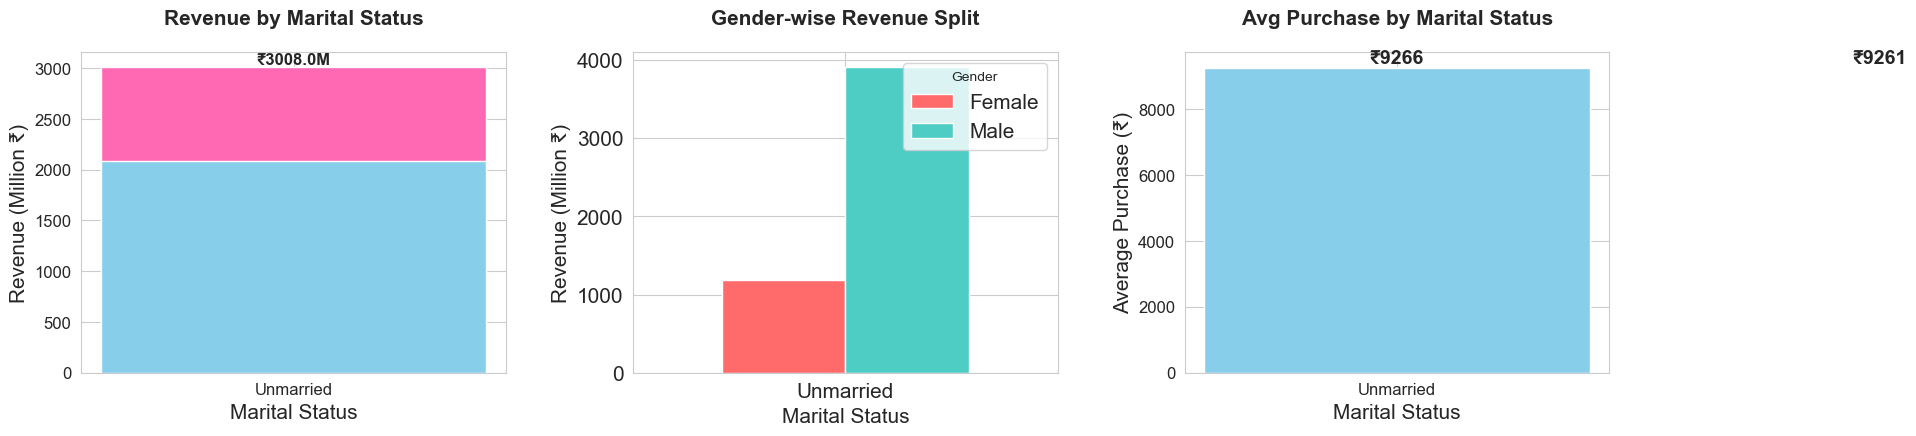

💡 MARITAL STATUS ANALYSIS - KEY BUSINESS INSIGHTS

💍 REVENUE COMPARISON:
   • Unmarried: ₹3008.0M revenue
   • Unmarried: ₹2086.0M revenue
   • Revenue Difference: ₹922.00M

💰 AVERAGE PURCHASE COMPARISON:
   • Unmarried avg purchase: ₹9,265.91
   • Unmarried avg purchase: ₹9,261.17
   • Difference per transaction: ₹4.74

🏆 KEY FINDINGS:
   • Unmarried customers generate MORE revenue
   • Transaction volume is higher for Unmarried customers
   • Both groups have similar average purchase amounts
   • Marital status alone is NOT a strong differentiator





In [15]:


# Visualization: Marital Status Impact Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 5)) 

# Plot 1: Revenue Comparison by Marital Status
colors_marital = ['#FF69B4', '#87CEEB']
axes[0].bar(marital_total['MARITAL_STATUS'], marital_total['Revenue_Million'], color=colors_marital)
axes[0].set_title('Revenue by Marital Status', fontsize=15, fontweight='bold', pad=20)
axes[0].set_ylabel('Revenue (Million ₹)', fontsize=15)
axes[0].set_xlabel('Marital Status', fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(marital_total['Revenue_Million']):
    axes[0].text(i, v, f'₹{v}M', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 2: Gender Split Revenue
pivot_marital = marital_analysis.pivot_table(
    index='MARITAL_STATUS', columns='gender', values='Revenue_Million', aggfunc='sum')
pivot_marital.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'], width=0.7)
axes[1].set_title('Gender-wise Revenue Split', fontsize=15, fontweight='bold', pad=20)
axes[1].set_ylabel('Revenue (Million ₹)', fontsize=15)
axes[1].set_xlabel('Marital Status', fontsize=15)
axes[1].legend(title='Gender', fontsize=15, loc='upper right')
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation=0)

# Plot 3: Average Purchase Amount per Transaction
axes[2].bar(marital_total['MARITAL_STATUS'], marital_total['Avg_Purchase'], color=['#FF69B4', '#87CEEB'])
axes[2].set_title('Avg Purchase by Marital Status', fontsize=15, fontweight='bold', pad=20)
axes[2].set_ylabel('Average Purchase (₹)', fontsize=15)
axes[2].set_xlabel('Marital Status', fontsize=15)
axes[2].tick_params(axis='both', labelsize=12)
for i, v in enumerate(marital_total['Avg_Purchase']):
    axes[2].text(i, v, f'₹{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout(pad=3.0) 
plt.subplots_adjust(wspace=0.3) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
top_marital = marital_total.iloc[0]
bottom_marital = marital_total.iloc[-1]
revenue_diff = abs(marital_total['Revenue_Million'].diff().iloc[-1])
avg_diff = abs(marital_total['Avg_Purchase'].diff().iloc[-1])

print("=" * 65)
print("💡 MARITAL STATUS ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
💍 REVENUE COMPARISON:
   • {marital_total.iloc[0]['MARITAL_STATUS']}: ₹{marital_total.iloc[0]['Revenue_Million']}M revenue
   • {marital_total.iloc[1]['MARITAL_STATUS']}: ₹{marital_total.iloc[1]['Revenue_Million']}M revenue
   • Revenue Difference: ₹{revenue_diff:.2f}M

💰 AVERAGE PURCHASE COMPARISON:
   • {marital_total.iloc[0]['MARITAL_STATUS']} avg purchase: ₹{marital_total.iloc[0]['Avg_Purchase']:,.2f}
   • {marital_total.iloc[1]['MARITAL_STATUS']} avg purchase: ₹{marital_total.iloc[1]['Avg_Purchase']:,.2f}
   • Difference per transaction: ₹{avg_diff:,.2f}

🏆 KEY FINDINGS:
   • {top_marital['MARITAL_STATUS']} customers generate MORE revenue
   • Transaction volume is higher for {top_marital['MARITAL_STATUS']} customers
   • Both groups have similar average purchase amounts
   • Marital status alone is NOT a strong differentiator


""")
print("=" * 65)


---
## 📊 Analysis 5: Product Category Performance
**Business Question**: Which product categories generate the most revenue?

In [16]:
# SQL Query: Top Product Categories
query5 = """
SELECT 
    PRODUCT_CATEGORY as Category,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
WHERE PRODUCT_CATEGORY IS NOT NULL
GROUP BY PRODUCT_CATEGORY
ORDER BY Revenue_Million DESC
LIMIT 10
"""

product_analysis = pd.read_sql(query5, conn)
print("🛍️ TOP 10 PRODUCT CATEGORIES BY REVENUE")
print("="*70)
display(product_analysis)

# Category-wise gender preference
query5_gender = """
SELECT 
    PRODUCT_CATEGORY as Category,
    GENDER,
    COUNT(*) as Transactions,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million
FROM purchases
WHERE PRODUCT_CATEGORY IS NOT NULL
GROUP BY PRODUCT_CATEGORY, GENDER
ORDER BY Revenue_Million DESC
LIMIT 20
"""

product_gender = pd.read_sql(query5_gender, conn)
print("\n👥 GENDER PREFERENCE IN TOP CATEGORIES:")
display(product_gender.head(10))

🛍️ TOP 10 PRODUCT CATEGORIES BY REVENUE


,Category,Transactions,Customers,Revenue_Million,Avg_Purchase
0,1,140378,5767,1910.0,13606.22
1,5,150933,5751,941.0,6240.09
2,8,113925,5659,854.0,7498.96
3,6,20466,4085,324.0,15838.48
4,2,23864,4296,268.0,11251.94
5,3,20213,3838,204.0,10096.71
6,16,9828,3130,145.0,14766.04
7,11,24287,3583,113.0,4685.27
8,10,5125,2328,100.0,19675.57
9,15,6290,2440,92.0,14780.45



👥 GENDER PREFERENCE IN TOP CATEGORIES:


,Category,gender,Transactions,Revenue_Million
0,1,Male,115547,1572.0
1,5,Male,108972,677.0
2,8,Male,80367,602.0
3,1,Female,24831,337.0
4,5,Female,41961,264.0
5,6,Male,15907,253.0
6,8,Female,33558,251.0
7,2,Male,18206,203.0
8,3,Male,14207,142.0
9,16,Male,7426,109.0


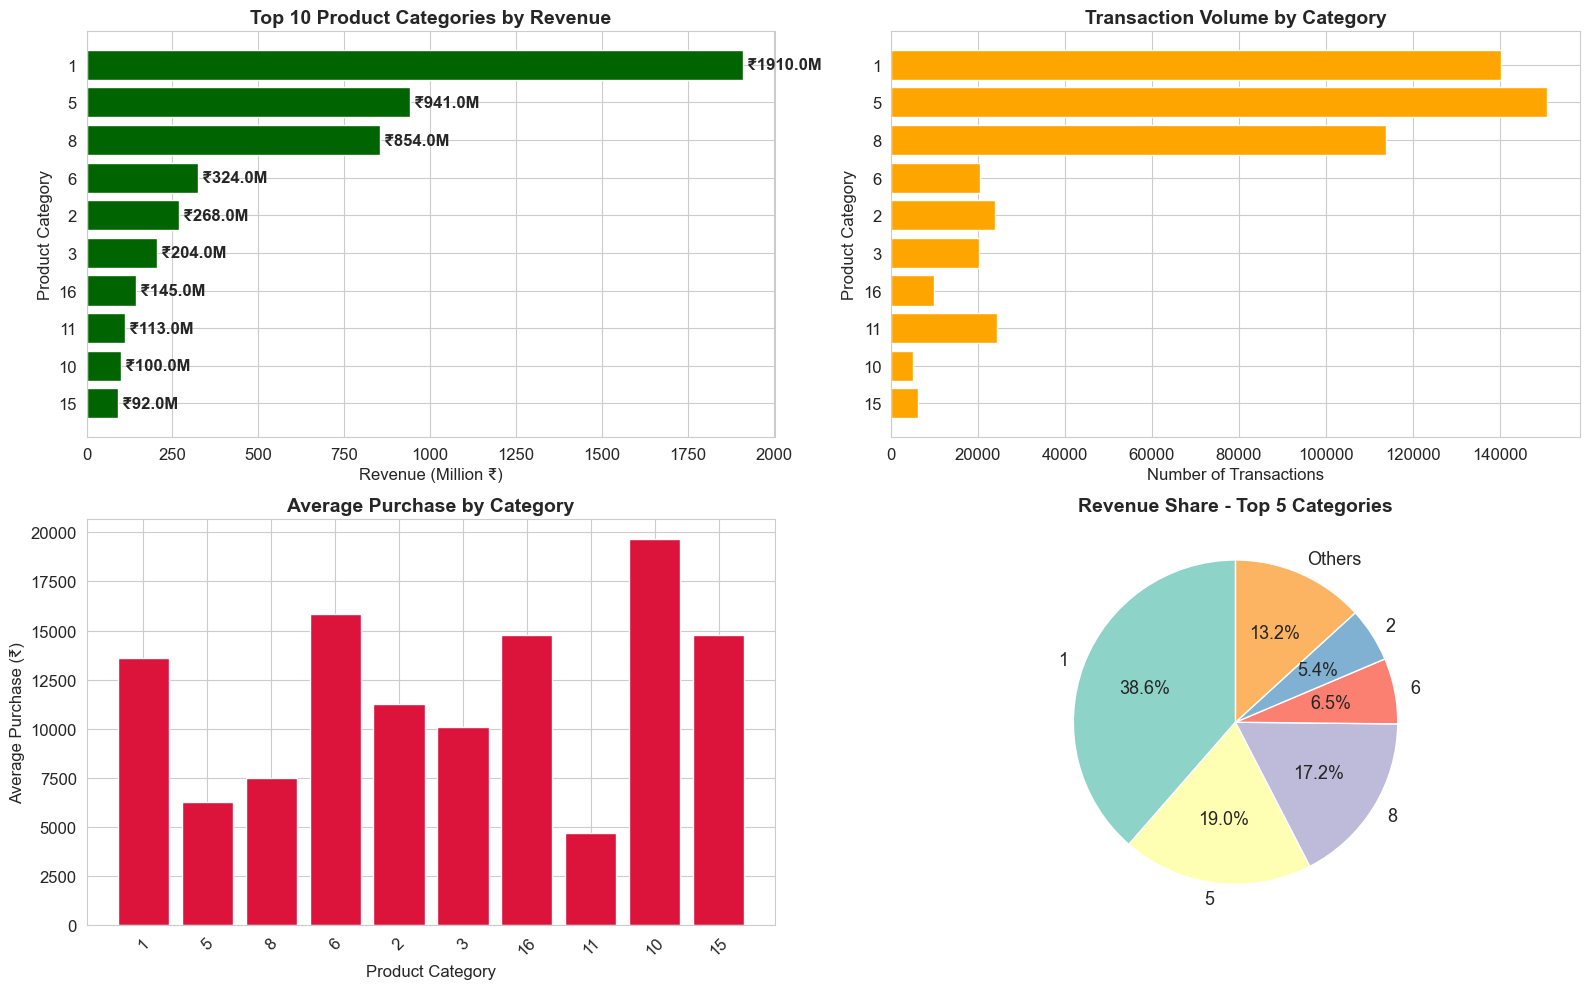

💡 PRODUCT CATEGORY ANALYSIS - KEY BUSINESS INSIGHTS

🏆 TOP 5 REVENUE CATEGORIES:
   #1 Category 1.0: ₹1910.0M | Avg: ₹13,606
   #2 Category 5.0: ₹941.0M | Avg: ₹6,240
   #3 Category 8.0: ₹854.0M | Avg: ₹7,499
   #4 Category 6.0: ₹324.0M | Avg: ₹15,838
   #5 Category 2.0: ₹268.0M | Avg: ₹11,252

📊 KEY METRICS:
   • Revenue Leader: Category 1.0 → ₹1910.0M
   • Highest Avg Purchase: Category 10.0 → ₹19,675.57
   • Top 3 categories contribute: 74.8% of total revenue
   • Total transactions in top 10: 515,309

💰 PARETO OBSERVATION:
   Top 3 categories = 75% of revenue (Pareto Principle applies)





In [17]:

# Visualization: Product Category Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Top 10 Categories by Revenue (Horizontal Bar Chart)
axes[0,0].barh(product_analysis['Category'].astype(str), product_analysis['Revenue_Million'], color='darkgreen')
axes[0,0].set_title('Top 10 Product Categories by Revenue', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Revenue (Million ₹)', fontsize=12)
axes[0,0].set_ylabel('Product Category', fontsize=12)
axes[0,0].invert_yaxis()
axes[0,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(product_analysis['Revenue_Million']):
    axes[0,0].text(v, i, f' ₹{v}M', va='center', fontweight='bold', fontsize=12)

# Plot 2: Transaction Volume (Horizontal Bar Chart)
axes[0,1].barh(product_analysis['Category'].astype(str), product_analysis['Transactions'], color='orange')
axes[0,1].set_title('Transaction Volume by Category', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Transactions', fontsize=12)
axes[0,1].set_ylabel('Product Category', fontsize=12)
axes[0,1].invert_yaxis()
axes[0,1].tick_params(axis='both', labelsize=12)

# Plot 3: Average Purchase Amount (Vertical Bar Chart)
axes[1,0].bar(product_analysis['Category'].astype(str), product_analysis['Avg_Purchase'], color='crimson')
axes[1,0].set_title('Average Purchase by Category', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Average Purchase (₹)', fontsize=12)
axes[1,0].set_xlabel('Product Category', fontsize=12)
axes[1,0].tick_params(axis='both', labelsize=12)
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Revenue Distribution (Pie Chart)
top5 = product_analysis.head(5)
others_revenue = product_analysis['Revenue_Million'][5:].sum()
pie_data = list(top5['Revenue_Million']) + [others_revenue]
pie_labels = list(top5['Category'].astype(str)) + ['Others']
colors_pie = plt.cm.Set3(range(len(pie_data)))
axes[1,1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, 
              colors=colors_pie, textprops={'fontsize': 13})
axes[1,1].set_title('Revenue Share - Top 5 Categories', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ==================== BUSINESS INSIGHTS ====================
top_cat = product_analysis.iloc[0]
highest_avg_cat = product_analysis.loc[product_analysis['Avg_Purchase'].idxmax()]
top3_revenue = product_analysis.head(3)['Revenue_Million'].sum()
total_revenue = product_analysis['Revenue_Million'].sum()
top3_percent = (top3_revenue / total_revenue) * 100

print("=" * 65)
print("💡 PRODUCT CATEGORY ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
🏆 TOP 5 REVENUE CATEGORIES:""")
for idx, row in product_analysis.head(5).iterrows():
    print(f"   #{idx+1} Category {row['Category']}: ₹{row['Revenue_Million']}M | Avg: ₹{row['Avg_Purchase']:,.0f}")

print(f"""
📊 KEY METRICS:
   • Revenue Leader: Category {top_cat['Category']} → ₹{top_cat['Revenue_Million']}M
   • Highest Avg Purchase: Category {highest_avg_cat['Category']} → ₹{highest_avg_cat['Avg_Purchase']:,.2f}
   • Top 3 categories contribute: {top3_percent:.1f}% of total revenue
   • Total transactions in top 10: {product_analysis['Transactions'].sum():,}

💰 PARETO OBSERVATION:
   Top 3 categories = {top3_percent:.0f}% of revenue (Pareto Principle applies)


""")
print("=" * 65)


---
## 📊 Analysis 6: Stay Duration Impact
**Business Question**: How does the number of years residing in current city impact purchase behavior?

In [18]:
# SQL Query: Stay Duration Analysis
query6 = """
SELECT 
    YEARS as Stay_Duration,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY YEARS
ORDER BY 
    CASE 
        WHEN YEARS = '4+' THEN 5
        ELSE CAST(years AS INTEGER)
    END
"""

stay_analysis = pd.read_sql(query6, conn)
print("📍 STAY DURATION ANALYSIS")
print("="*70)
display(stay_analysis)

# Stay duration with city category
query6_city = """
SELECT 
    YEARS as Stay_Duration,
    CITY_CATEGORY,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM PURCHASES
GROUP BY YEARS, CITY_CATEGORY
ORDER BY Revenue_Million DESC
LIMIT 15
"""

stay_city = pd.read_sql(query6_city, conn)
print("\n🏙️ STAY DURATION vs CITY CATEGORY:")
display(stay_city.head(10))

📍 STAY DURATION ANALYSIS


,Stay_Duration,Transactions,Customers,Revenue_Million,Avg_Purchase
0,0,74398,772,682.0,9180.08
1,1,193821,2086,1792.0,9250.15
2,2,101838,1145,949.0,9320.43
3,3,95285,979,884.0,9286.90
4,4,84726,909,785.0,9275.60



🏙️ STAY DURATION vs CITY CATEGORY:


,Stay_Duration,city_category,Revenue_Million,Avg_Purchase
0,1,B,765.0,9178.99
1,1,C,589.0,9647.04
2,1,A,437.0,8878.65
3,3,B,392.0,9189.99
4,2,B,384.0,9193.01
5,2,C,321.0,9769.95
6,4,B,318.0,9192.62
7,3,C,271.0,9767.69
8,4,C,270.0,9736.61
9,0,B,255.0,8902.62


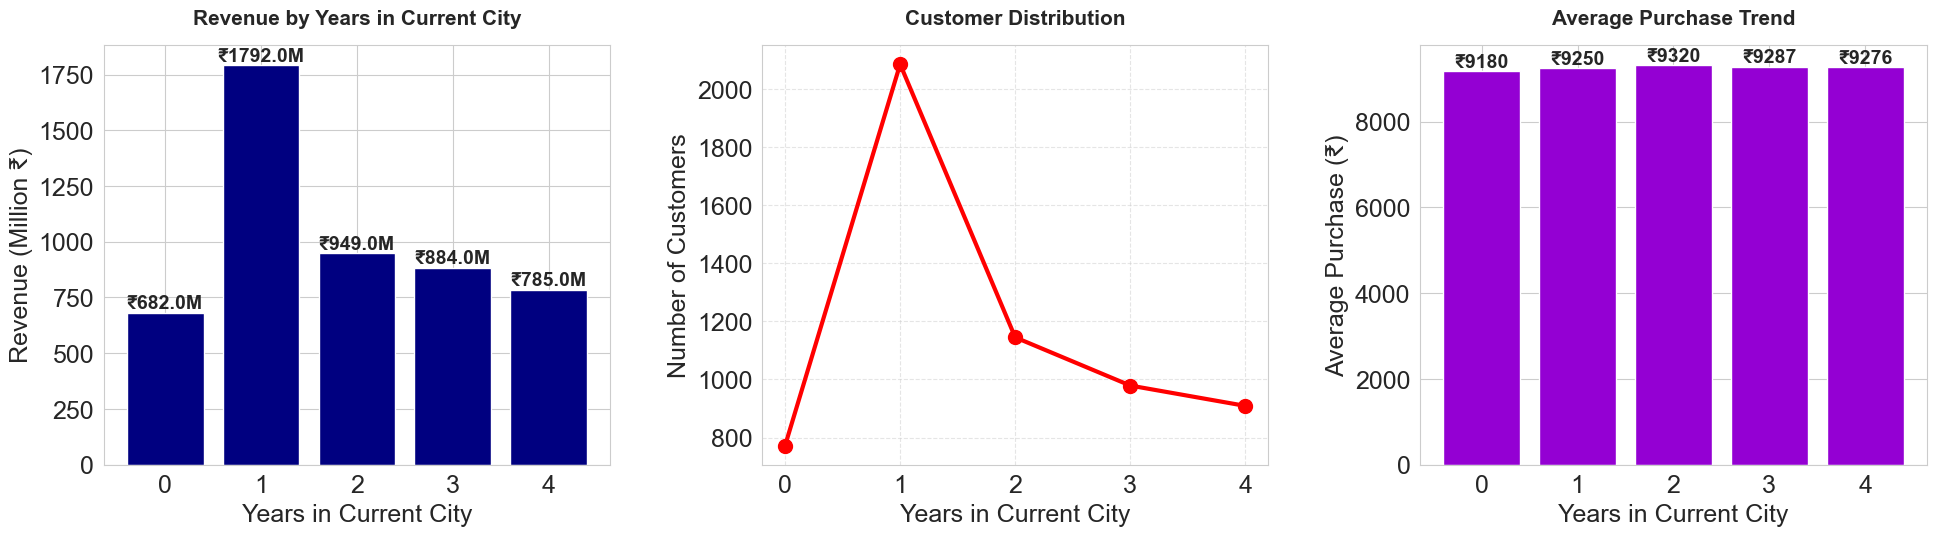

💡 STAY DURATION ANALYSIS - KEY BUSINESS INSIGHTS

📍 REVENUE BY YEARS IN CITY:
   0.0 years: ₹682.0M | 772.0 customers | Avg: ₹9,180
   1.0 years: ₹1792.0M | 2,086.0 customers | Avg: ₹9,250
   2.0 years: ₹949.0M | 1,145.0 customers | Avg: ₹9,320
   3.0 years: ₹884.0M | 979.0 customers | Avg: ₹9,287
   4.0 years: ₹785.0M | 909.0 customers | Avg: ₹9,276

🏆 KEY FINDINGS:
   • Highest Revenue:       1.0 years → ₹1792.0M
   • Highest Avg Purchase:  2.0 years → ₹9,320.43
   • Most Customers:        1.0 years → 2,086.0

📊 LOYALTY INSIGHT:
   • New residents (1 year) tend to shop more — exploring their city
   • Long-stay residents (4+ years) are established buyers
   • Stay duration reflects city familiarity and brand loyalty





In [19]:



# Visualization: Stay Duration Impact Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Total Revenue by Stay Duration
axes[0].bar(stay_analysis['Stay_Duration'], stay_analysis['Revenue_Million'], color='navy')
axes[0].set_title('Revenue by Years in Current City', fontsize=15, fontweight='bold', pad=15)
axes[0].set_ylabel('Revenue (Million ₹)', fontsize=18)
axes[0].set_xlabel('Years in Current City', fontsize=18)
axes[0].tick_params(axis='both', labelsize=18)
for i, v in enumerate(stay_analysis['Revenue_Million']):
    axes[0].text(i, v, f'₹{v}M', ha='center', va='bottom', fontweight='bold', fontsize=14)

# Plot 2: Customer Distribution by Stay Duration (Line Chart)
axes[1].plot(stay_analysis['Stay_Duration'], stay_analysis['Customers'], 
             marker='o', linewidth=3, markersize=10, color='red')
axes[1].set_title('Customer Distribution', fontsize=15, fontweight='bold', pad=15)
axes[1].set_ylabel('Number of Customers', fontsize=18)
axes[1].set_xlabel('Years in Current City', fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Average Purchase Trend by Stay Duration
axes[2].bar(stay_analysis['Stay_Duration'], stay_analysis['Avg_Purchase'], color='darkviolet')
axes[2].set_title('Average Purchase Trend', fontsize=15, fontweight='bold', pad=15)
axes[2].set_ylabel('Average Purchase (₹)', fontsize=18)
axes[2].set_xlabel('Years in Current City', fontsize=18)
axes[2].tick_params(axis='both', labelsize=18)
for i, v in enumerate(stay_analysis['Avg_Purchase']):
    axes[2].text(i, v, f'₹{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.3) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
top_stay = stay_analysis.loc[stay_analysis['Revenue_Million'].idxmax()]
highest_avg_stay = stay_analysis.loc[stay_analysis['Avg_Purchase'].idxmax()]
most_customers_stay = stay_analysis.loc[stay_analysis['Customers'].idxmax()]

print("=" * 65)
print("💡 STAY DURATION ANALYSIS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
📍 REVENUE BY YEARS IN CITY:""")
for idx, row in stay_analysis.iterrows():
    print(f"   {row['Stay_Duration']} years: ₹{row['Revenue_Million']}M | {row['Customers']:,} customers | Avg: ₹{row['Avg_Purchase']:,.0f}")

print(f"""
🏆 KEY FINDINGS:
   • Highest Revenue:       {top_stay['Stay_Duration']} years → ₹{top_stay['Revenue_Million']}M
   • Highest Avg Purchase:  {highest_avg_stay['Stay_Duration']} years → ₹{highest_avg_stay['Avg_Purchase']:,.2f}
   • Most Customers:        {most_customers_stay['Stay_Duration']} years → {most_customers_stay['Customers']:,}

📊 LOYALTY INSIGHT:
   • New residents (1 year) tend to shop more — exploring their city
   • Long-stay residents (4+ years) are established buyers
   • Stay duration reflects city familiarity and brand loyalty


""")
print("=" * 65)


---
## 📊 Analysis 7: High-Value Customer Segments
**Business Question**: Who are the premium customers who spend the most?

In [20]:
# SQL Query: High-Value Customer Analysis
query7 = """
WITH customer_spending AS (
    SELECT 
        USER_ID,
        GENDER,
        AGE,
        CITY_CATEGORY,
        COUNT(*) as Total_Purchases,
        SUM(Purchase) as Total_Spent,
        AVG(Purchase) as Avg_Purchase
    FROM PURCHASES
    GROUP BY USER_ID, GENDER, AGE, CITY_CATEGORY
),
customer_segments AS (
    SELECT 
        *,
        CASE 
            WHEN TOTAL_SPENT >= 1000000 THEN 'Platinum'
            WHEN TOTAL_SPENT >= 500000 THEN 'Gold'
            WHEN TOTAL_SPENT >= 200000 THEN 'Silver'
            ELSE 'Bronze'
        END as CUSTOMER_SEGMENTS
    FROM CUSTOMER_SPENDING
)
SELECT 
    CUSTOMER_SEGMENTS,
    COUNT(*) as Customer_Count,
    ROUND(SUM(Total_Spent)/1000000, 2) as Total_Revenue_Million,
    ROUND(AVG(Total_Spent), 2) as Avg_Customer_Value,
    ROUND(AVG(Total_Purchases), 2) as Avg_Purchases_Per_Customer
FROM CUSTOMER_SEGMENTS
GROUP BY CUSTOMER_SEGMENTS
ORDER BY 
    CASE CUSTOMER_SEGMENTS
        WHEN 'Platinum' THEN 1
        WHEN 'Gold' THEN 2
        WHEN 'Silver' THEN 3
        WHEN 'Bronze' THEN 4
    END
"""

segment_analysis = pd.read_sql(query7, conn)
print("💎 CUSTOMER SEGMENTATION ANALYSIS")
print("="*70)
print("Segment Criteria:")
print("  • Platinum: Total Spent >= ₹10,00,000")
print("  • Gold: ₹5,00,000 <= Total Spent < ₹10,00,000")
print("  • Silver: ₹2,00,000 <= Total Spent < ₹5,00,000")
print("  • Bronze: Total Spent < ₹2,00,000")
print("\n")
display(segment_analysis)

# Calculate revenue contribution
total_revenue = segment_analysis['Total_Revenue_Million'].sum()
segment_analysis['Revenue_Contribution_%'] = round(
    (segment_analysis['Total_Revenue_Million'] / total_revenue) * 100, 2
)

print("\n📊 REVENUE CONTRIBUTION BY SEGMENT:")
for idx, row in segment_analysis.iterrows():
    print(f"  • {row['CUSTOMER_SEGMENTS']}: {row['Revenue_Contribution_%']}% of total revenue")
    print(f"    ({row['Customer_Count']:,} customers generating ₹{row['Total_Revenue_Million']}M)")

💎 CUSTOMER SEGMENTATION ANALYSIS
Segment Criteria:
  • Platinum: Total Spent >= ₹10,00,000
  • Gold: ₹5,00,000 <= Total Spent < ₹10,00,000
  • Silver: ₹2,00,000 <= Total Spent < ₹5,00,000
  • Bronze: Total Spent < ₹2,00,000




,CUSTOMER_SEGMENTS,Customer_Count,Total_Revenue_Million,Avg_Customer_Value,Avg_Purchases_Per_Customer
0,Platinum,1650,3370.0,2042880.38,222.64
1,Gold,1393,1003.0,720191.91,74.88
2,Silver,1723,562.0,326599.69,34.68
3,Bronze,1125,159.0,141423.57,16.57



📊 REVENUE CONTRIBUTION BY SEGMENT:
  • Platinum: 66.16% of total revenue
    (1,650 customers generating ₹3370.0M)
  • Gold: 19.69% of total revenue
    (1,393 customers generating ₹1003.0M)
  • Silver: 11.03% of total revenue
    (1,723 customers generating ₹562.0M)
  • Bronze: 3.12% of total revenue
    (1,125 customers generating ₹159.0M)


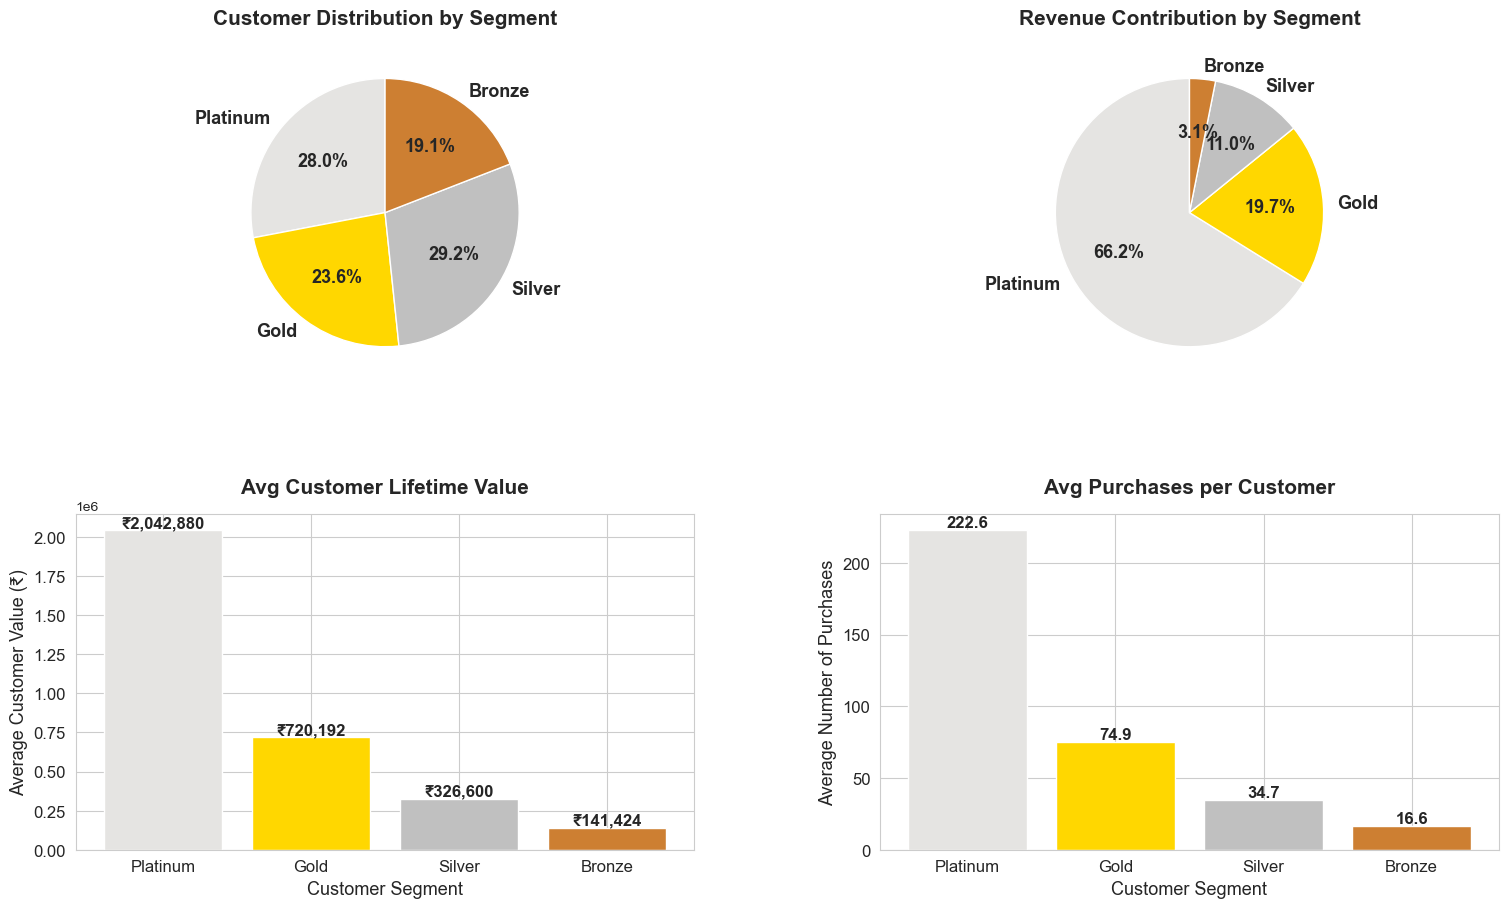

💡 CUSTOMER SEGMENTATION - KEY BUSINESS INSIGHTS

💎 SEGMENT BREAKDOWN:
   💠 Platinum: 1,650 customers → ₹3370.0M (66.16% revenue)
   🥇 Gold:     1,393 customers → ₹1003.0M (19.69% revenue)
   🥈 Silver:   1,723 customers → ₹562.0M (11.03% revenue)
   🥉 Bronze:   1,125 customers → ₹159.0M (3.12% revenue)

🏆 PARETO ANALYSIS (Premium Segment):
   • Platinum + Gold = 51.7% of customers
   • But they generate 85.8% of revenue
   • This confirms the 80-20 rule in customer value

💰 AVERAGE CUSTOMER VALUE:
   • Platinum CLV: ₹2,042,880
   • Gold CLV:     ₹720,192
   • Silver CLV:   ₹326,600
   • Bronze CLV:   ₹141,424





In [21]:



# Visualization: Customer Segmentation Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
segment_colors = ['#E5E4E2', '#FFD700', '#C0C0C0', '#CD7F32']

# Plot 1: Customer Distribution by Segment (Pie Chart)
axes[0,0].pie(segment_analysis['Customer_Count'], 
              labels=segment_analysis['CUSTOMER_SEGMENTS'], 
              autopct='%1.1f%%', startangle=90, colors=segment_colors,
              textprops={'fontsize': 13, 'fontweight': 'bold'})
axes[0,0].set_title('Customer Distribution by Segment', fontsize=15, fontweight='bold', pad=15)

# Plot 2: Revenue Contribution by Segment (Pie Chart)
axes[0,1].pie(segment_analysis['Total_Revenue_Million'], 
              labels=segment_analysis['CUSTOMER_SEGMENTS'], 
              autopct='%1.1f%%', startangle=90, colors=segment_colors,
              textprops={'fontsize': 13, 'fontweight': 'bold'})
axes[0,1].set_title('Revenue Contribution by Segment', fontsize=15, fontweight='bold', pad=15)

# Plot 3: Average Customer Lifetime Value (Bar Chart)
axes[1,0].bar(segment_analysis['CUSTOMER_SEGMENTS'], segment_analysis['Avg_Customer_Value'], color=segment_colors)
axes[1,0].set_title('Avg Customer Lifetime Value', fontsize=15, fontweight='bold', pad=15)
axes[1,0].set_ylabel('Average Customer Value (₹)', fontsize=13)
axes[1,0].set_xlabel('Customer Segment', fontsize=13)
axes[1,0].tick_params(axis='both', labelsize=12)
for i, v in enumerate(segment_analysis['Avg_Customer_Value']):
    axes[1,0].text(i, v, f'₹{v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 4: Average Purchases per Customer (Bar Chart)
axes[1,1].bar(segment_analysis['CUSTOMER_SEGMENTS'], segment_analysis['Avg_Purchases_Per_Customer'], color=segment_colors)
axes[1,1].set_title('Avg Purchases per Customer', fontsize=15, fontweight='bold', pad=15)
axes[1,1].set_ylabel('Average Number of Purchases', fontsize=13)
axes[1,1].set_xlabel('Customer Segment', fontsize=13)
axes[1,1].tick_params(axis='both', labelsize=12)
for i, v in enumerate(segment_analysis['Avg_Purchases_Per_Customer']):
    axes[1,1].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout(pad=4.0)
plt.subplots_adjust(wspace=0.3, hspace=0.4) 
plt.show()

# ==================== BUSINESS INSIGHTS ====================
total_customers_all = segment_analysis['Customer_Count'].sum()
total_revenue_all = segment_analysis['Total_Revenue_Million'].sum()

platinum = segment_analysis[segment_analysis['CUSTOMER_SEGMENTS']=='Platinum'].iloc[0]
gold = segment_analysis[segment_analysis['CUSTOMER_SEGMENTS']=='Gold'].iloc[0]
silver = segment_analysis[segment_analysis['CUSTOMER_SEGMENTS']=='Silver'].iloc[0]
bronze = segment_analysis[segment_analysis['CUSTOMER_SEGMENTS']=='Bronze'].iloc[0]

premium_customers = platinum['Customer_Count'] + gold['Customer_Count']
premium_revenue = platinum['Total_Revenue_Million'] + gold['Total_Revenue_Million']
premium_pct = (premium_revenue / total_revenue_all) * 100
premium_cust_pct = (premium_customers / total_customers_all) * 100

print("=" * 65)
print("💡 CUSTOMER SEGMENTATION - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
💎 SEGMENT BREAKDOWN:
   💠 Platinum: {platinum['Customer_Count']:,} customers → ₹{platinum['Total_Revenue_Million']}M ({platinum['Revenue_Contribution_%']}% revenue)
   🥇 Gold:     {gold['Customer_Count']:,} customers → ₹{gold['Total_Revenue_Million']}M ({gold['Revenue_Contribution_%']}% revenue)
   🥈 Silver:   {silver['Customer_Count']:,} customers → ₹{silver['Total_Revenue_Million']}M ({silver['Revenue_Contribution_%']}% revenue)
   🥉 Bronze:   {bronze['Customer_Count']:,} customers → ₹{bronze['Total_Revenue_Million']}M ({bronze['Revenue_Contribution_%']}% revenue)

🏆 PARETO ANALYSIS (Premium Segment):
   • Platinum + Gold = {premium_cust_pct:.1f}% of customers
   • But they generate {premium_pct:.1f}% of revenue
   • This confirms the 80-20 rule in customer value

💰 AVERAGE CUSTOMER VALUE:
   • Platinum CLV: ₹{platinum['Avg_Customer_Value']:,.0f}
   • Gold CLV:     ₹{gold['Avg_Customer_Value']:,.0f}
   • Silver CLV:   ₹{silver['Avg_Customer_Value']:,.0f}
   • Bronze CLV:   ₹{bronze['Avg_Customer_Value']:,.0f}


""")
print("=" * 65)


---
## 📊 Analysis 8: Combined Demographic Insights
**Business Question**: What is the best customer profile based on Age, Gender, and City combination?


In [22]:
# SQL Query: Combined Demographic Analysis
query8 = """
SELECT 
    GENDER,
    AGE_CATEGORY,
    CITY_CATEGORY,
    COUNT(*) as Transactions,
    COUNT(DISTINCT User_ID) as Customers,
    ROUND(SUM(Purchase)/1000000, 2) as Revenue_Million,
    ROUND(AVG(Purchase), 2) as Avg_Purchase
FROM purchases
GROUP BY GENDER, AGE_CATEGORY, CITY_CATEGORY
ORDER BY Revenue_Million DESC
LIMIT 20
"""

combined_analysis = pd.read_sql(query8, conn)
print("🎯 TOP 20 CUSTOMER PROFILES BY REVENUE")
print("="*70)
display(combined_analysis)

# Best performing combination
best_profile = combined_analysis.iloc[0]
print(f"\n🏆 HIGHEST REVENUE PROFILE:")
print(f"   Gender: {best_profile['gender']}")
print(f"   Age: {best_profile['age_category']}")
print(f"   City: {best_profile['city_category']}")
print(f"   Revenue: ₹{best_profile['Revenue_Million']}M")
print(f"   Customers: {best_profile['Customers']:,}")
print(f"   Avg Purchase: ₹{best_profile['Avg_Purchase']:,.2f}")

🎯 TOP 20 CUSTOMER PROFILES BY REVENUE


,gender,age_category,city_category,Transactions,Customers,Revenue_Million,Avg_Purchase
0,Male,Young Adult,B,101708,705,951.0,9350.78
1,Male,Young Adult,A,77520,496,700.0,9031.69
2,Male,Young Adult,C,64639,1089,645.0,9993.68
3,Male,Adult,B,50490,325,469.0,9303.99
4,Male,Adult,C,38986,700,387.0,9940.98
5,Female,Young Adult,B,33123,278,277.0,8376.81
6,Male,Adult,A,25869,158,229.0,8889.03
7,Female,Young Adult,A,23760,179,203.0,8556.51
8,Male,Senior,C,20189,385,196.0,9741.32
9,Female,Young Adult,C,18497,375,167.0,9065.49



🏆 HIGHEST REVENUE PROFILE:
   Gender: Male
   Age: Young Adult
   City: B
   Revenue: ₹951.0M
   Customers: 705
   Avg Purchase: ₹9,350.78


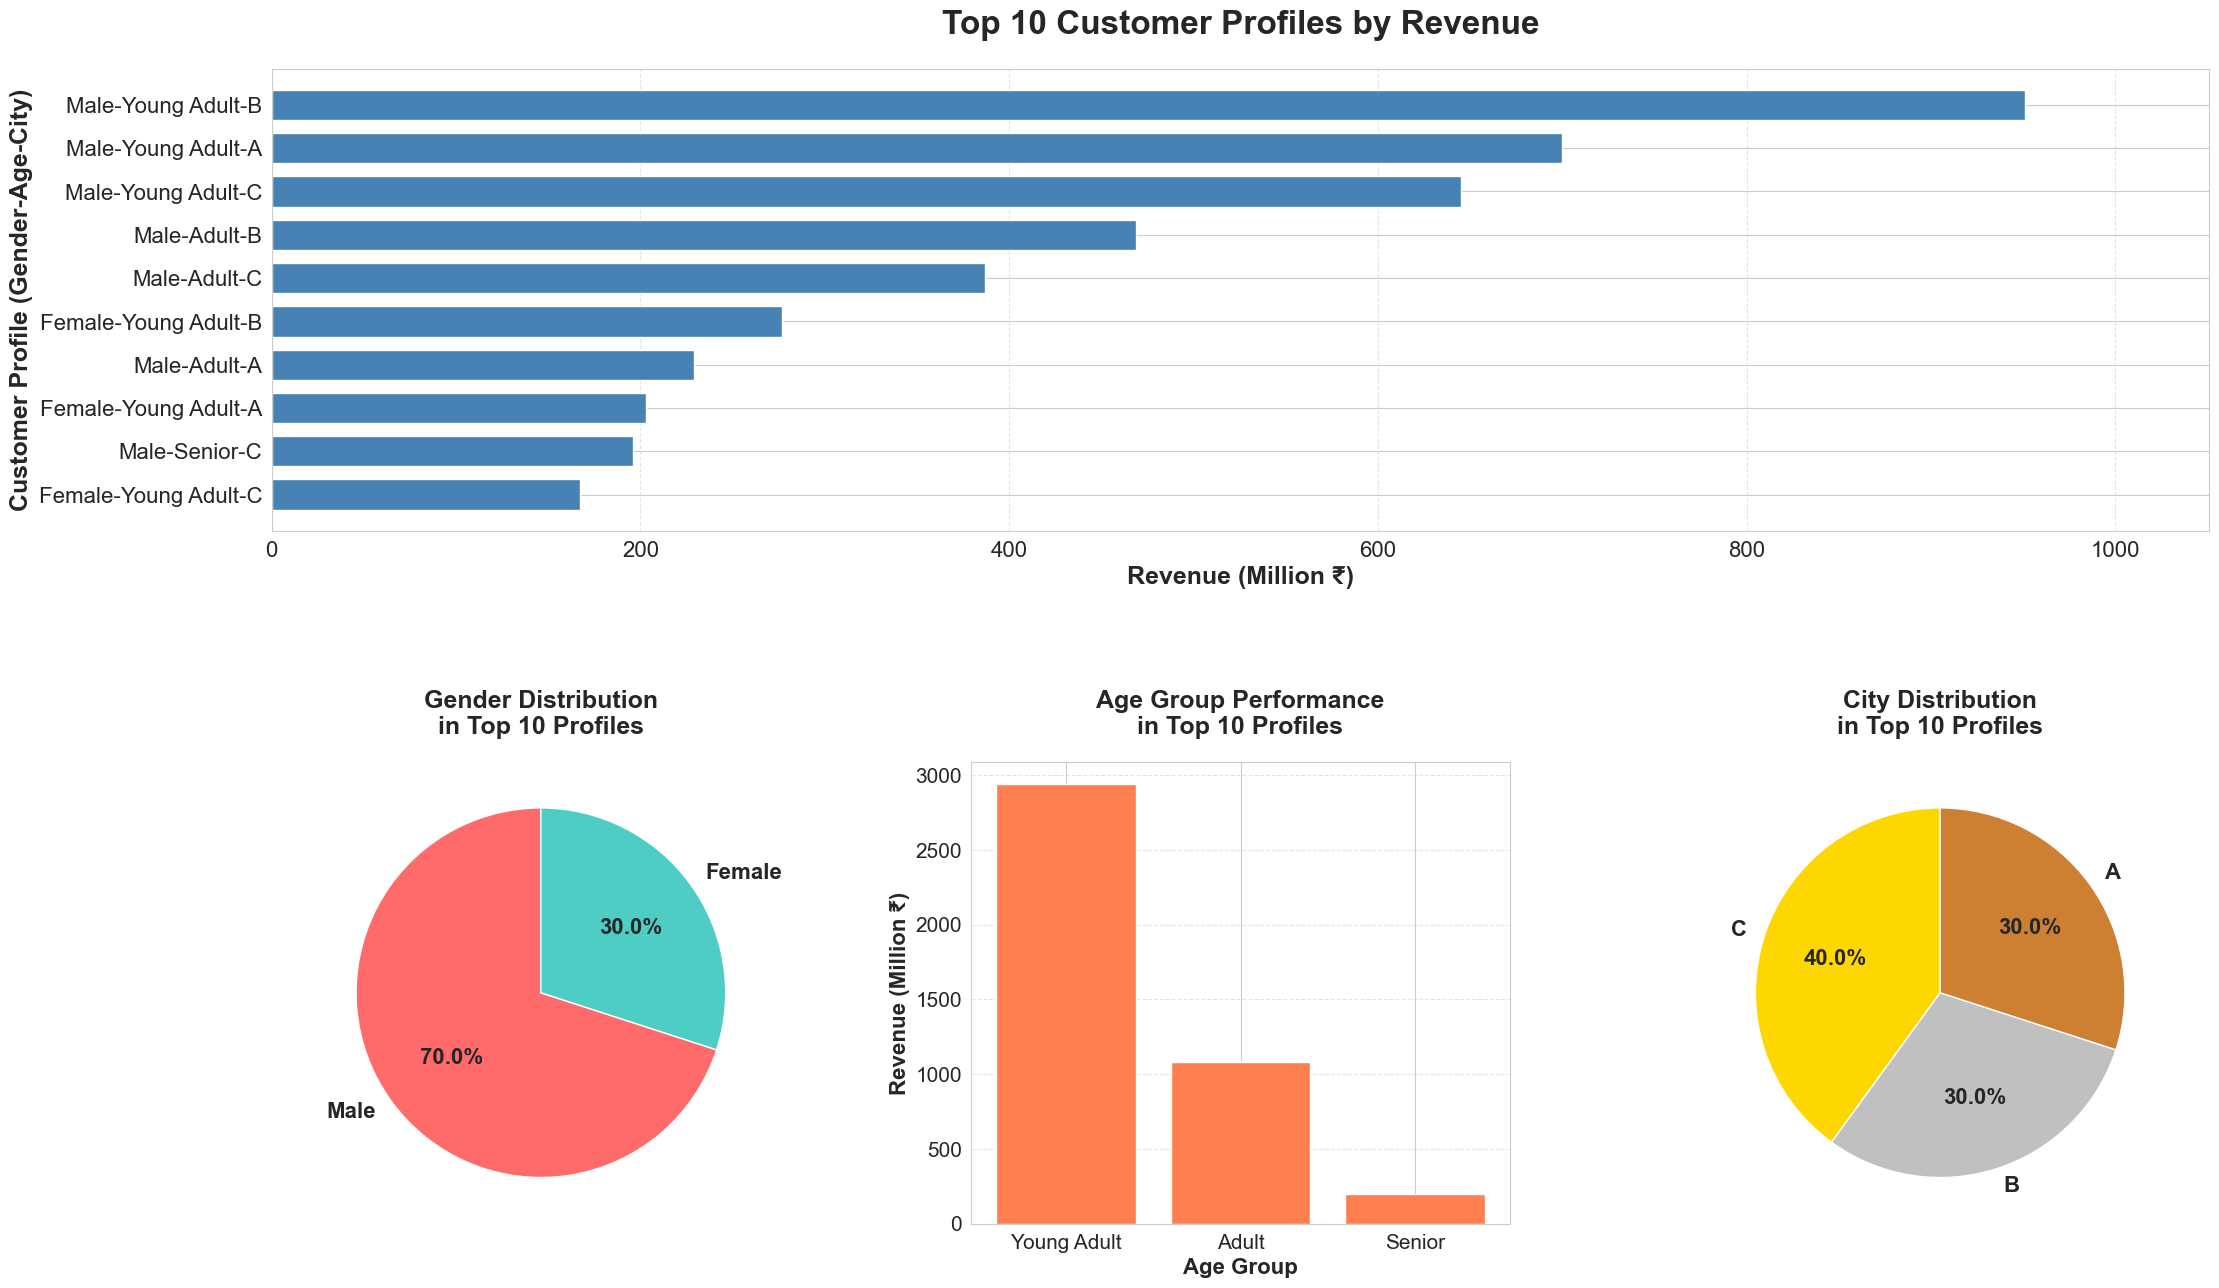

💡 COMBINED DEMOGRAPHICS - KEY BUSINESS INSIGHTS

🏆 #1 BEST CUSTOMER PROFILE:
   • Gender:   Male
   • Age:      Young Adult
   • City:     B
   • Revenue:  ₹951.0M
   • Customers:705
   • Avg Buy:  ₹9,350.78

📊 TOP 10 PROFILES SUMMARY:
   • Dominant Gender: Male (7 out of 10 profiles)
   • Top Age Group:   Young Adult (highest revenue in top 10)
   • Top City:        C (most profiles in top 10)

🎯 IDEAL TARGET CUSTOMER:
   Gender Male + Age Young Adult + City C
   This combination delivers maximum revenue potential





In [23]:



# Visualization: Combined Customer Profile Insights
fig = plt.figure(figsize=(25, 15))
gs = fig.add_gridspec(2, 3, hspace=0.5, wspace=0.3)

# Plot 1: Top 10 Customer Profiles by Revenue
ax1 = fig.add_subplot(gs[0, :])
top10 = combined_analysis.head(10)
labels = [f"{row['gender']}-{row['age_category']}-{row['city_category']}" for _, row in top10.iterrows()]
ax1.barh(labels, top10['Revenue_Million'], color='steelblue', height=0.7)
ax1.set_title('Top 10 Customer Profiles by Revenue', fontsize=24, fontweight='bold', pad=25)
ax1.set_xlabel('Revenue (Million ₹)', fontsize=18, fontweight='bold')
ax1.set_ylabel('Customer Profile (Gender-Age-City)', fontsize=18, fontweight='bold')
ax1.tick_params(axis='both', labelsize=16)
max_val = top10['Revenue_Million'].max()
# for i, v in enumerate(top10['Revenue_Million']):
#     ax1.text(v + 5, i, f' ₹{v}M', va='center', ha='left', fontweight='bold', fontsize=16)
ax1.invert_yaxis()
ax1.set_xlim(0, max_val + 100)
ax1.xaxis.grid(True, linestyle='--', alpha=0.5)

# Plot 2: Gender Distribution (Pie Chart)
ax2 = fig.add_subplot(gs[1, 0])
gender_counts = top10['gender'].value_counts()
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4'], startangle=90,
        textprops={'fontsize': 16, 'fontweight': 'bold'})
ax2.set_title('Gender Distribution\nin Top 10 Profiles', fontsize=18, fontweight='bold', pad=20)

# Plot 3: Age Group Performance (Bar Chart)
ax3 = fig.add_subplot(gs[1, 1])
age_revenue = top10.groupby('age_category')['Revenue_Million'].sum().sort_values(ascending=False)
ax3.bar(range(len(age_revenue)), age_revenue.values, color='coral')
ax3.set_title('Age Group Performance\nin Top 10 Profiles', fontsize=18, fontweight='bold', pad=20)
ax3.set_ylabel('Revenue (Million ₹)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Age Group', fontsize=16, fontweight='bold')
ax3.set_xticks(range(len(age_revenue)))
ax3.set_xticklabels(age_revenue.index, rotation=0, fontsize=15)
ax3.tick_params(axis='y', labelsize=15)
ax3.yaxis.grid(True, linestyle='--', alpha=0.5)

# Plot 4: City Distribution (Pie Chart)
ax4 = fig.add_subplot(gs[1, 2])
city_counts = top10['city_category'].value_counts()
ax4.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', 
        colors=['#FFD700', '#C0C0C0', '#CD7F32'], startangle=90,
        textprops={'fontsize': 16, 'fontweight': 'bold'})
ax4.set_title('City Distribution\nin Top 10 Profiles', fontsize=18, fontweight='bold', pad=20)

plt.show()

# ==================== BUSINESS INSIGHTS ====================
best_profile = combined_analysis.iloc[0]
top_gender = top10['gender'].value_counts().index[0]
top_age_combined = age_revenue.index[0]
top_city_combined = city_counts.index[0]

print("=" * 65)
print("💡 COMBINED DEMOGRAPHICS - KEY BUSINESS INSIGHTS")
print("=" * 65)
print(f"""
🏆 #1 BEST CUSTOMER PROFILE:
   • Gender:   {best_profile['gender']}
   • Age:      {best_profile['age_category']}
   • City:     {best_profile['city_category']}
   • Revenue:  ₹{best_profile['Revenue_Million']}M
   • Customers:{best_profile['Customers']:,}
   • Avg Buy:  ₹{best_profile['Avg_Purchase']:,.2f}

📊 TOP 10 PROFILES SUMMARY:
   • Dominant Gender: {top_gender} ({gender_counts.iloc[0]} out of 10 profiles)
   • Top Age Group:   {top_age_combined} (highest revenue in top 10)
   • Top City:        {top_city_combined} (most profiles in top 10)

🎯 IDEAL TARGET CUSTOMER:
   Gender {top_gender} + Age {top_age_combined} + City {top_city_combined}
   This combination delivers maximum revenue potential


""")
print("=" * 65)


# Statistical Analysis Using Hypothesis Testing

# BUSINESS QUESTION: Do women spend more on Black Friday than men?

In [24]:
import scipy.stats as stats

# 1. Data Preparation
# Extracting purchase amounts for Male and Female customers from the dataframe
male_purchase = df[df['gender'] == 'Male']['purchase']
female_purchase = df[df['gender'] == 'Female']['purchase']

# 2. Defining Hypothesis
# Null Hypothesis (H0): There is no significant difference between the mean spending of Men and Women.
# Alternative Hypothesis (H1): There is a significant difference in the mean spending between Men and Women.

print("--- Statistical Analysis: Independent Two-Sample T-Test ---")

# 3. Performing Welch's T-test 
# (Used because sample sizes and variances for Men and Women might be different)
t_stat, p_value = stats.ttest_ind(male_purchase, female_purchase, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# 4. Result Interpretation
alpha = 0.05  # 5% Significance Level

if p_value < alpha:
    print("\nResult: Reject the Null Hypothesis (H0).")
    print("Insight: The difference in spending between Men and Women is Statistically Significant.")
else:
    print("\nResult: Fail to reject the Null Hypothesis (H0).")
    print("Insight: There is no strong statistical evidence of a difference in spending.")

# 5. Final Conclusion based on Means
male_mean = male_purchase.mean()
female_mean = female_purchase.mean()

print("-" * 60)
print(f"Average Spend (Male):   ₹{male_mean:.2f}")
print(f"Average Spend (Female): ₹{female_mean:.2f}")

if female_mean > male_mean and p_value < alpha:
    print("\nConclusion: Yes, women spend significantly more than men.")
elif male_mean > female_mean and p_value < alpha:
    print("\nConclusion: No, men actually spend significantly more than women.")
else:
    print("\nConclusion: There is no significant difference in spending based on gender.")

--- Statistical Analysis: Independent Two-Sample T-Test ---
T-statistic: 46.3582
P-value: 0.0000e+00

Result: Reject the Null Hypothesis (H0).
Insight: The difference in spending between Men and Women is Statistically Significant.
------------------------------------------------------------
Average Spend (Male):   ₹9437.53
Average Spend (Female): ₹8734.57

Conclusion: No, men actually spend significantly more than women.


In [ ]:
# Close database connection
conn.close()
print("✅ Analysis complete! Database connection closed.")